<a href="https://colab.research.google.com/github/ivanrango/Machine-Learning/blob/master/Trabajo_Pr%C3%A1ctico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1:

In [2]:
import pandas as pd
url='https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
df=pd.read_csv(url)
print(df.head(5))

        fecha  confirmados  ...  aislamiento_por_contacto_estrecho  aprehendidos
0  2020-06-30          106  ...                                181             0
1  2020-07-01          114  ...                                172             0
2  2020-07-02          124  ...                                176             0
3  2020-07-03          137  ...                                190             0
4  2020-07-04          154  ...                                214             0

[5 rows x 11 columns]


In [ ]:
print(df)

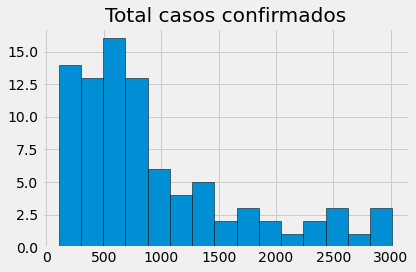

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

generador = (elemento for elemento in range(88))
type(generador)
y = np.fromiter(generador, np.int)

conf=df[['confirmados']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(conf, bins=15, edgecolor='black')
plt.title('Total casos confirmados')
#plt.xlabel('')
#plt.ylabel('')

plt.tight_layout()

plt.show()


Se observa que el total de confirmados no sigue una distribución normal o Gaussiana. Estos datos son agregados, es decir, a cada nuevo dato se le suma el anterior. Por lo tanto es de interés ver el comportamiento de los datos desagregados (casos diarios).

In [4]:
import numpy as np
import matplotlib.pyplot as plt


conf=df[['confirmados']].T.to_numpy()
#print(conf.shape)
#print(conf)



In [5]:
confb = [conf[0,0]]
#print(confb)
for i in range (1,88):
  #confb = np.array([conf])
  #confb = np.insert([conf[0,0]],1,[conf[0,i]])
   aux = [conf[0,i]-conf[0,i-1]]
   #confb.append(aux)
   confb = np.append([confb],aux)
  #print(conf[0,i])
#print(confb.shape)
#print(confb)

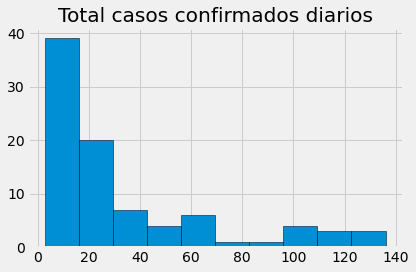

In [6]:
plt.hist(confb, bins=10, edgecolor='black')
plt.title('Total casos confirmados diarios')
plt.tight_layout()

plt.show()


De manera similar, se observa que los casos diarios tampoco siguen una distribución Gaussiana, de hecho a simple vista la tendencia parece ser exponencial decreciente.

Text(0, 0.5, 'Casos')

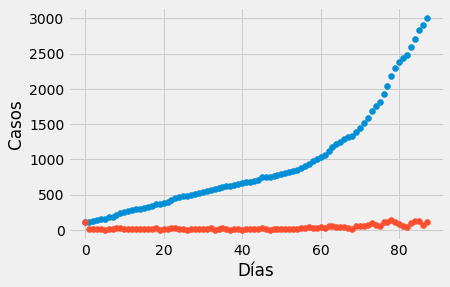

In [7]:

plt.scatter(y,conf)
plt.scatter(y,confb)
plt.xlabel('Días')
plt.ylabel('Casos')

En esta Figura se observa que los casos totales confirmados (azul) aumentan exponencialmente, mientras que la tendencia de los casos confirmados diarios (rojo) no es exponencial, sino aproximadamente constante.

A continuación se presentan los histogramas del resto de las variables que componen el dataset:


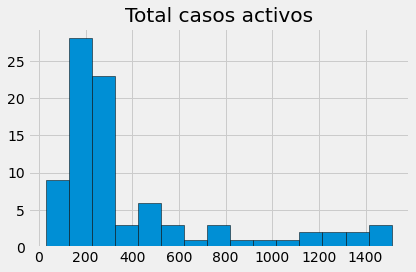

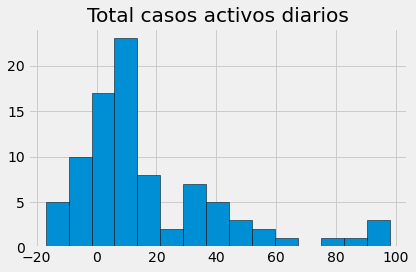

In [65]:
act=df[['activos']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(act, bins=15, edgecolor='black')
plt.title('Total casos activos')
plt.tight_layout()
plt.show()
#print(act)

act=df[['activos']].T.to_numpy()
actb = [act[0,0]]
for i in range (1,88):
   aux = [act[0,i]-act[0,i-1]]
   actb = np.append([actb],aux)
#print(actb)   

plt.hist(actb, bins=15, edgecolor='black')
plt.title('Total casos activos diarios')
plt.tight_layout()

plt.show()


Nuevamente no se observa un comportamiento Gaussiano en los datos de los casos activos totales, tampoco se observa que el histograma de los casos activos diarios siga un comportamiento Gaussiano, aunque se aproxima un poco más a tal distribución de probabilidad, con un sesgo importante hacia la izquierda (los valores negativos corresponenden a disminución de casos diarios).

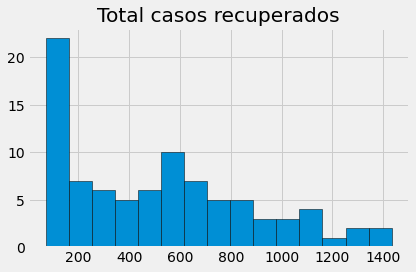

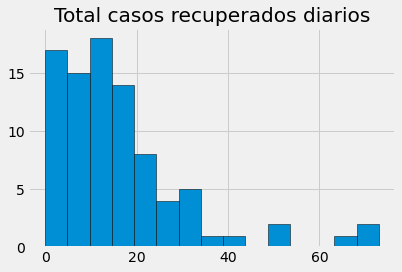

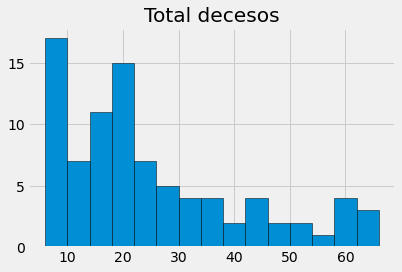

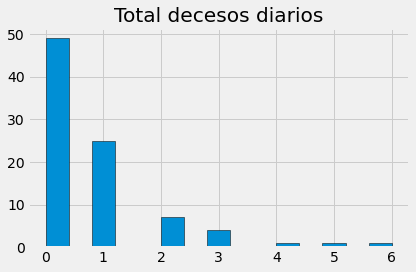

In [13]:
x=df[['recuperados']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(x, bins=15, edgecolor='black')
plt.title('Total casos recuperados')
plt.tight_layout()
plt.show()
#print(x)

x=df[['recuperados']].T.to_numpy()
xb = [x[0,0]]
for i in range (1,88):
   aux = [x[0,i]-x[0,i-1]]
   xb = np.append([xb],aux)
#print(xb)   

plt.hist(xb, bins=15, edgecolor='black')
plt.title('Total casos recuperados diarios')
plt.tight_layout()

plt.show()

x=df[['decesos']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(x, bins=15, edgecolor='black')
plt.title('Total decesos')
plt.tight_layout()
plt.show()
#print(x)

x=df[['decesos']].T.to_numpy()
xb = [x[0,0]]
for i in range (1,88):
   aux = [x[0,i]-x[0,i-1]]
   xb = np.append([xb],aux)
#print(xb)   

plt.hist(xb, bins=15, edgecolor='black')
plt.title('Total decesos diarios')
plt.tight_layout()

plt.show()


El análisis es análogo al de los casos activos totales y activos diarios.

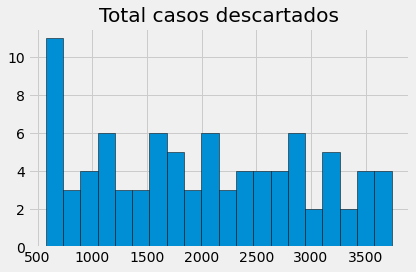

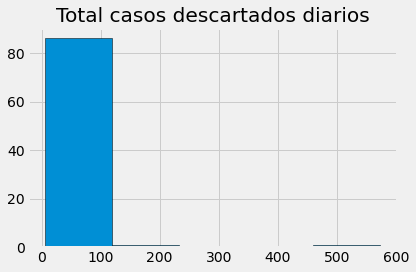

Text(0, 0.5, 'Casos descartados diarios')

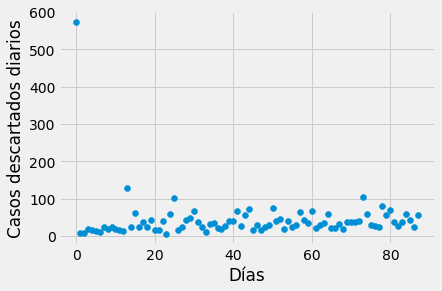

In [12]:

x=df[['descartados']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(x, bins=20, edgecolor='black')
plt.title('Total casos descartados')
plt.tight_layout()
plt.show()
#print(x)

x=df[['descartados']].T.to_numpy()
xb = [x[0,0]]
for i in range (1,88):
   aux = [x[0,i]-x[0,i-1]]
   xb = np.append([xb],aux)
#print(xb)   

plt.hist(xb, bins=5, edgecolor='black')
plt.title('Total casos descartados diarios')
plt.tight_layout()

plt.show()

import matplotlib.pyplot as plt
generador = (elemento for elemento in range(88))
type(generador)
y = np.fromiter(generador, np.int)
#y=df[['fecha']].T.to_numpy()
#print(y.shape)
plt.scatter(y,xb)
plt.xlabel('Días')
plt.ylabel('Casos descartados diarios')

En este caso, además de no observarse una distribución Gaussiana de los datos de los casos descartados totales y de los casos descartados diarios, se observa una peculiaridad en estos últimos datos, a saber, los valores de los casos descartados diarios se encuentran todos en el intervalo [0,100] a lo largo de los 88 días estudiados.

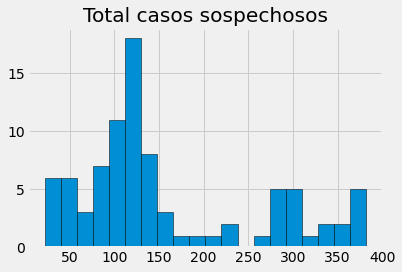

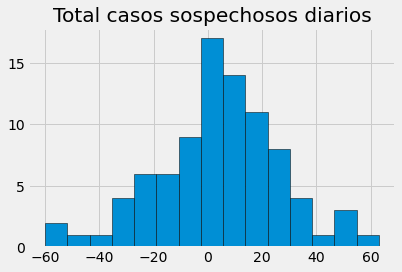

Text(0, 0.5, 'Casos sospechosos diarios')

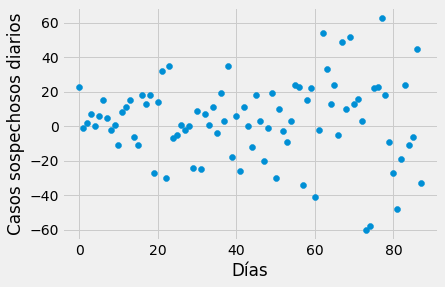

In [18]:
x=df[['sospechosos']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(x, bins=20, edgecolor='black')
plt.title('Total casos sospechosos')
plt.tight_layout()
plt.show()
#print(x)

x=df[['sospechosos']].T.to_numpy()
xb = [x[0,0]]
for i in range (1,88):
   aux = [x[0,i]-x[0,i-1]]
   xb = np.append([xb],aux)
#print(xb)   

plt.hist(xb, bins=15, edgecolor='black')
plt.title('Total casos sospechosos diarios')
plt.tight_layout()

plt.show()


plt.scatter(y,xb)
plt.xlabel('Días')
plt.ylabel('Casos sospechosos diarios')

Los datos de casos sospechosos diarios presentan una distribución aproximadamente Gaussiana, con los valores más probables alrededor de cero. Este comportamiento también se observa en la última figura, donde se presentan los puntos de dispersión. Se aprecia que la nube de puntos se encuentra alrededor de cero, sin embargo se observa que a medida que avanzan los días, disminuye la precisión de los valores.

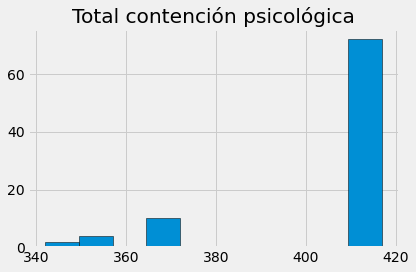

In [121]:
x=df[['contencion_psicologica']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(x, bins=10, edgecolor='black')
plt.title('Total contención psicológica')
plt.tight_layout()
plt.show()
#print(x)

Text(0, 0.5, 'Casos')

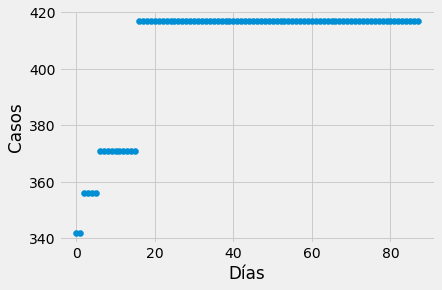

In [122]:
plt.scatter(y,x)
plt.xlabel('Días')
plt.ylabel('Casos')

En cuanto a la categoría "Contención psicológica", se observa que los casos por días son contantes, observándose aumentos escalonados hasta alcanzar un valor cercano a los 420 casos diarios los cuales se mantienen constantes hasta el último día estudiado. Nuevamente, no se observa que la distribución de los datos sea Gaussiana.


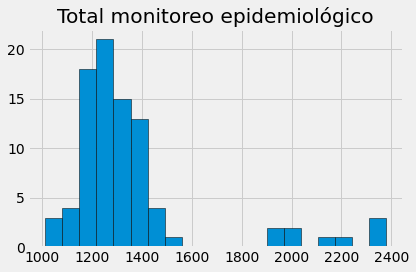

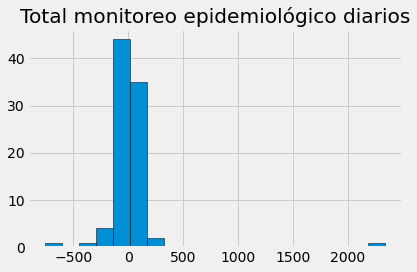

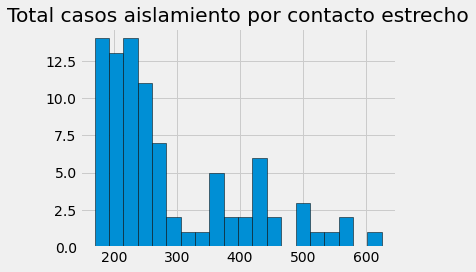

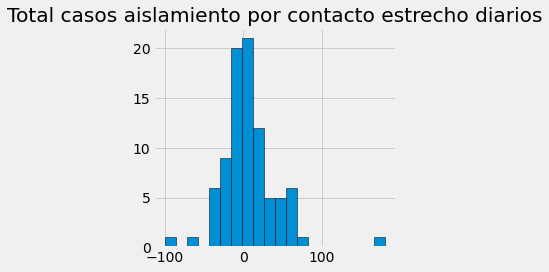

In [26]:
x=df[['monitoreo_epidemiologico']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(x, bins=20, edgecolor='black')
plt.title('Total monitoreo epidemiológico')
plt.tight_layout()
plt.show()
#print(x)

x=df[['monitoreo_epidemiologico']].T.to_numpy()
xb = [x[0,0]]
for i in range (1,88):
   aux = [x[0,i]-x[0,i-1]]
   xb = np.append([xb],aux)
#print(xb)   

plt.hist(xb, bins=20, edgecolor='black')
plt.title('Total monitoreo epidemiológico diarios')
plt.tight_layout()

plt.show()


x=df[['aislamiento_por_contacto_estrecho']].to_numpy()
plt.style.use('fivethirtyeight')
plt.hist(x, bins=20, edgecolor='black')
plt.title('Total casos aislamiento por contacto estrecho')
plt.tight_layout()
plt.show()
#print(x)

x=df[['aislamiento_por_contacto_estrecho']].T.to_numpy()
xb = [x[0,0]]
for i in range (1,88):
   aux = [x[0,i]-x[0,i-1]]
   xb = np.append([xb],aux)
#print(xb)   

plt.hist(xb, bins=20, edgecolor='black')
plt.title('Total casos aislamiento por contacto estrecho diarios')
plt.tight_layout()

plt.show()




Finalmente, ni los datos de monitoreo epidemiológico, ni los datos de aislamiento por contacto estrecho presentan una distribución de tipo Gaussiana.
